In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tf_ms_ssim
import sys
sys.path.insert(0,'/home/dirty_mike/Dropbox/github/image_quality_analysis/bin')
import iqa_tools as iqa
import tensorflow as tf
from tensorflow.python.saved_model import tag_constants

In [2]:
# writing a single image pair to file to demo with ms_ssim code
data_path = '/home/dirty_mike/Dropbox/github/image_quality_analysis/data/sample_data/'

orig_500 = pd.read_csv('{}orig_500.txt'.format(data_path), header=None, delim_whitespace = True).values.reshape(500,96,96)
recon_500 = pd.read_csv('{}recon_500.txt'.format(data_path), header=None, delim_whitespace = True).values.reshape(500,96,96)

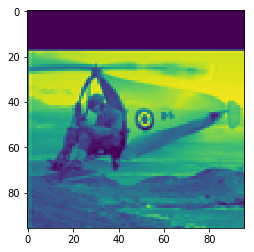

In [3]:
plt.imshow(orig_500[0,:,:])
plt.show()

In [4]:
res = tf_ms_ssim.MultiScaleSSIM(np.reshape(orig_500[0,:,:], [1,96,96,1]), np.reshape(recon_500[0,:,:], [1,96,96,1]))

(1, 96, 96, 1) (2, 1, 96, 96, 1)
(1, 48, 48, 1) (2, 1, 48, 48, 1)
(1, 24, 24, 1) (2, 1, 24, 24, 1)
(1, 12, 12, 1) (2, 1, 12, 12, 1)
(1, 6, 6, 1) (2, 1, 6, 6, 1)


/usr/local/lib/python3.5/dist-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/usr/local/lib/python3.5/dist-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


In [24]:
msssim_res = []
for ii in range(500):
    res = tf_ms_ssim.MultiScaleSSIM(np.reshape(orig_500[ii,:,:], [1,96,96,1]), np.reshape(recon_500[ii,:,:], [1,96,96,1]))
    msssim_res.append(res)

In [25]:
np.mean(msssim_res), np.var(msssim_res)

(0.90540535851504189, 0.00087015930517558306)

In [26]:
np.savetxt('msssimAnalytic500.csv', msssim_res)

In [5]:
data_path = '/home/dirty_mike/Dropbox/github/image_quality_analysis/data/sample_data/'
train_features, train_target, test_features, test_target = iqa.load_data(local=True, path=data_path)

In [7]:
train_features.shape

(500, 96, 96, 4)

In [ ]:
for ii in range(0,86):
    for jj in range(0,86):
        